# 2*2 Pixel Projection to 3D bloch sphere

In [1]:
import qiskit
import numpy as np
from qiskit import QuantumCircuit, BasicAer, IBMQ, Aer
from qiskit import transpile, execute
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector
from math import pi
from PIL import Image

In [5]:
import os 
os.path.abspath('')

'c:\\Users\\HCI\\Desktop\\Stereo'

In [101]:
path_img_2 = 'pixel.png'
path_img_2 = os.path.join(os.path.abspath(''),
                            path_img_2)
print(path_img_2)

c:\Users\HCI\Desktop\Stereo\pixel.png


In [109]:
def projection(pix_proj, r, h_img, w_img, h_proj, w_proj):

    (row, col) = pix_proj

    x = row
    y = col
    z = 0
    print("x,y,z = ",x,y,z)
    Q = np.array([x, y, z], dtype=np.float32)

    P = get_point_on_sphere(Q, r)
    
    return P


def get_point_on_sphere(point,r):

    [x, y, z] = point
    k = 2 * r**2 / (x**2 + y**2 + r**2)
    print("k = ", k)
    return np.array([k * x, k * y, (k - 1) * r]) / np.sqrt((k * x)**2 + (k * y)**2 + ((k-1)*r)**2)

In [110]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])

In [111]:
img = np.array(Image.open(path_img_2))

h_img = img.shape[0]
w_img = img.shape[1]
h_proj_2 = 2
w_proj_2 = 2
r = 1

x = 0.5

proj_2 = np.array([[x,x,0],
                 [-x,x,0],
                 [-x,-x,0],
                 [x,-x,0]])


x,y,z =  0.5 0.5 0
k =  1.3333333333333333
x,y,z =  -0.5 0.5 0
k =  1.3333333333333333
x,y,z =  -0.5 -0.5 0
k =  1.3333333333333333
x,y,z =  0.5 -0.5 0
k =  1.3333333333333333
point_2d =  [array([0.5, 0.5, 0. ]), array([-0.5,  0.5,  0. ]), array([-0.5, -0.5,  0. ]), array([ 0.5, -0.5,  0. ])]
point_3d =  [array([0.66666667, 0.66666667, 0.33333333]), array([-0.66666667,  0.66666667,  0.33333333]), array([-0.66666667, -0.66666667,  0.33333333]), array([ 0.66666667, -0.66666667,  0.33333333])]


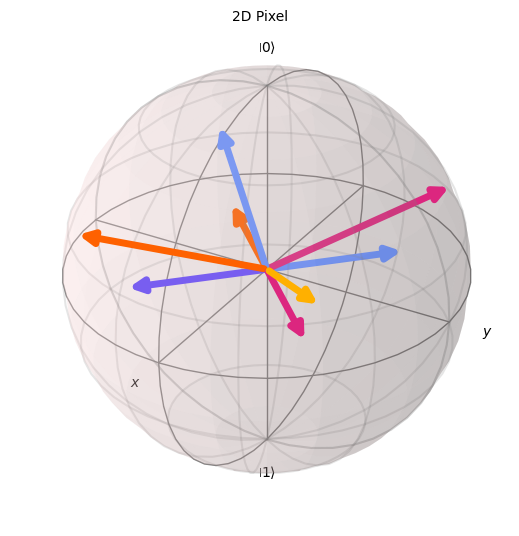

In [112]:
point_2d = []
point_3d = []

for i in proj_2:
    sphere = projection(i[:2], r, h_img, w_img, h_proj_2, w_proj_2)
    point_2d.append(i)    
    point_3d.append(sphere)

print('point_2d = ', point_2d)
print('point_3d = ', point_3d)


plot_bloch_vector(point_2d+point_3d, title='2D Pixel')
#plot_bloch_vector(point_3d, title='3D projection')

# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list


In [113]:
def Statevec(P):
    x,y,z = P
    theta  = np.arccos(z)
    phi = np.arctan2(y,x)

    a = np.cos(theta/2)
    b = complex(np.sin(phi),np.sin(phi))*np.sin(theta/2)

    return Statevector([a,b])


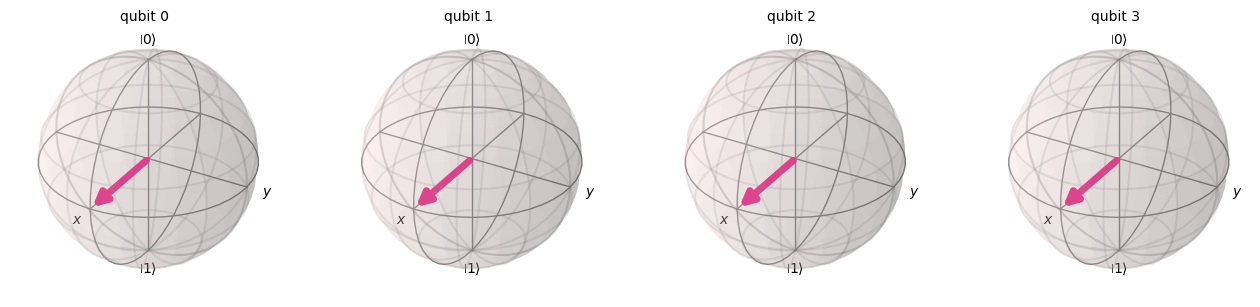

In [114]:
qc= QuantumCircuit(4,1)

qc.h(range(4))

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [115]:
path_img_3 = 'pixel2.png'
path_img_3 = os.path.join(os.path.abspath(''),
                            path_img_3)
print(path_img_3)

img_3 = np.array(Image.open(path_img_3))

h_img_3 = img_3.shape[0]
w_img_3 = img_3.shape[1]
h_proj_3 = 3
w_proj_3 = 3
r = 1

x = 0.3

proj_3 = np.array([[-x,x,0],[0,x,0],[x,x,0],
                   [-x,0,0],[0,0,0],[x,0,0],
                 [-x,-x,0],[0,-x,0],[x,-x,0]])


c:\Users\HCI\Desktop\Stereo\pixel2.png


x,y,z =  -0.3 0.3 0
k =  1.6949152336898665
x,y,z =  0.0 0.3 0
k =  1.8348623732807718
x,y,z =  0.3 0.3 0
k =  1.6949152336898665
x,y,z =  -0.3 0.0 0
k =  1.8348623732807718
x,y,z =  0.0 0.0 0
k =  2.0
x,y,z =  0.3 0.0 0
k =  1.8348623732807718
x,y,z =  -0.3 -0.3 0
k =  1.6949152336898665
x,y,z =  0.0 -0.3 0
k =  1.8348623732807718
x,y,z =  0.3 -0.3 0
k =  1.6949152336898665
point_2d =  [array([-0.3,  0.3,  0. ]), array([0. , 0.3, 0. ]), array([0.3, 0.3, 0. ]), array([-0.3,  0. ,  0. ]), array([0., 0., 0.]), array([0.3, 0. , 0. ]), array([-0.3, -0.3,  0. ]), array([ 0. , -0.3,  0. ]), array([ 0.3, -0.3,  0. ])]
point_3d =  [array([-0.50847459,  0.50847459,  0.69491523]), array([0.        , 0.55045873, 0.83486237]), array([0.50847459, 0.50847459, 0.69491523]), array([-0.55045873,  0.        ,  0.83486237]), array([0., 0., 1.]), array([0.55045873, 0.        , 0.83486237]), array([-0.50847459, -0.50847459,  0.69491523]), array([ 0.        , -0.55045873,  0.83486237]), array([ 0.50847459, 

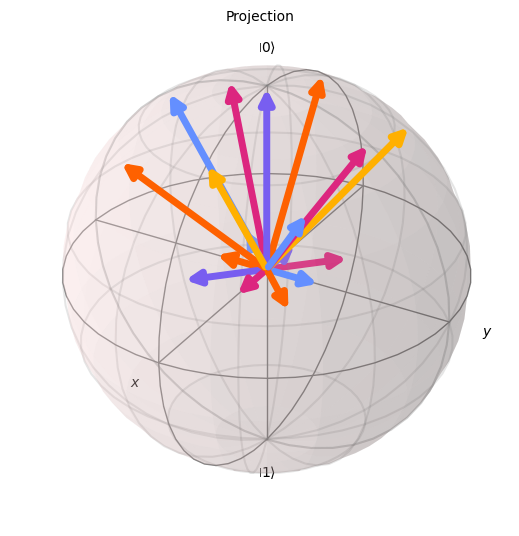

In [116]:
point_2d_3 = []
point_3d_3 = []

for i in proj_3:
    sphere = projection(i[:2], r, h_img, w_img, h_proj_3, w_proj_3)
    point_2d_3.append(i)    
    point_3d_3.append(sphere)

print('point_2d = ', point_2d_3)
print('point_3d = ', point_3d_3)


plot_bloch_vector(point_2d_3+point_3d_3, title='Projection')
#plot_bloch_vector(point_3d, title='3D projection')

# sphere 는 np.ndarray 이고, point_3d는 list이다. append(sphere) 로 np.ndarray를 list에 추가,
# point_3d는 array를 포함하는 list